***Name : Kshetraphal Bohara***

***Roll Number : MSICE009***

I am using google colab for coding. 


**Problem:**  A medical company tested two medicines say A and B to know the effectiveness of medicines to cure certain type of influenza. Medicine A is given to 200 populations for observation and classified as class 1 category. Medicine B is given to other 200 population and classified as class 2 category. The features selected to classify the medicines are side effect of medicines and progress on cure. These features are scaled in positive and negative values. For example positive value of side effect means common side effect and negative value of side effect means uncommon side effect. Similarly positive value of progress on cure means recovery is in progress. Negative value indicates no progress on recovery.

**Question1.** Load medical data. The medical data consists three columns, the first column is side effect of medicine in terms of value. The second column is recovery data in terms of value. The last column is class type.
Plot the features for the medicine A and B and label the axes. 

**Question 2.**Classify the medical data by using perception algorithm and support vector machine.




In [1]:
# first of all importing all the dependencies 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import learning_curve 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn import svm 
from sklearn.neural_network import MLPClassifier 
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import Perceptron 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from pandas.plotting import scatter_matrix 
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load data set 
filename = '/content/drive/MyDrive/Colab Notebooks/ml_assignment_dataset/medical.txt' 
headings = ['side_effect','recovery_data', 'class'] 
dataframe = pd.read_csv(filename, sep="\t", names=headings) 
data_array = dataframe.values 
X = data_array[:,0:2] 
y = data_array[:,2] 

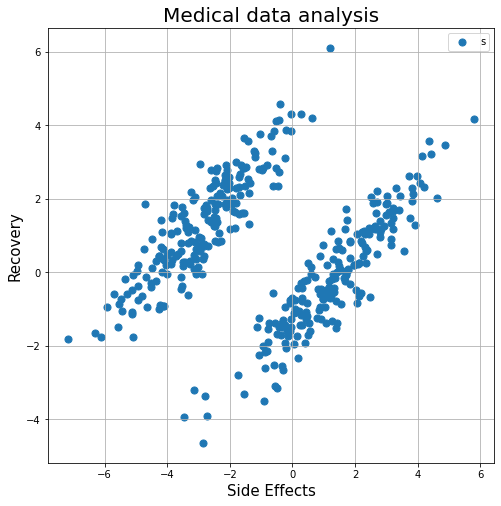

In [4]:
fig = plt.figure(figsize = (8,8)) 
g = fig.add_subplot(1,1,1) 
g.set_xlabel('Side Effects', fontsize = 15) 
g.set_ylabel('Recovery', fontsize = 15) 
g.set_title('Medical data analysis', fontsize = 20) 
groups = ['side_effect','recovery_data'] 
g.scatter(dataframe["side_effect"], dataframe["recovery_data"], marker="o", s = 50) 
g.legend('scatter') 
g.grid()

In [5]:
clf=Perceptron(tol=1e-3, random_state=0) 
clf.fit(X, y) 
clf.score(X, y)

1.0

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


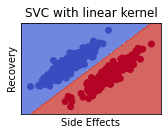

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


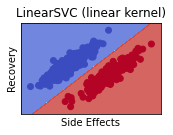

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


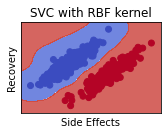

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


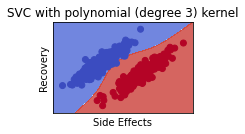

In [6]:
# step size
h = 0.02 
# regualarization parameter
C = 1.0 
X=dataframe.iloc[:,:2]
y=dataframe.iloc[:,2]
#fit svm with different types of kernel
svc=svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc=svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc=svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc=svm.LinearSVC(C=C).fit(X, y)
# create a mesh to plot the decision classifier
x_min, x_max=X.iloc[:, 0].min() -1, X.iloc[:, 0].max() +1
y_min, y_max=X.iloc[:, 1].min() -1, X.iloc[:, 1].max() +1
xx, yy=np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
titles= ['SVC with linear kernel','LinearSVC (linear kernel)','SVC with RBF kernel','SVC with polynomial (degree 3) kernel']
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
  plt.subplot(2, 2, i+1)
  plt.subplots_adjust(wspace=0.4, hspace=0.4)
  Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
  # Put the result into a color plot
  Z=Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
  # Plot also the training points
  plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm)
  plt.xlabel('Side Effects')
  plt.ylabel('Recovery')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.title(titles[i])
  plt.show()

**Problem 2** You will need to load the files orange.txt
Perform a k-nearest mean clustering, with k = 3 and the 3 first observations as initial means.
Use ordinary euclidian distance as dissimilarity measure. You do not need to perform any
initial normalizing of the data.
Make 6 plots of the data projected to the coordinate planes, where the points are colored
according to the clusters.
Now you may possibly sense a structure, but it is not easy to see how the clusters look in 4 dimensions, or even in 3-dimensional subspaces.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import euclidean_distances

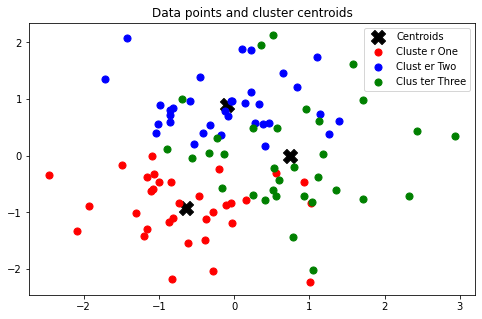

Generating 3D representation of clusters : 


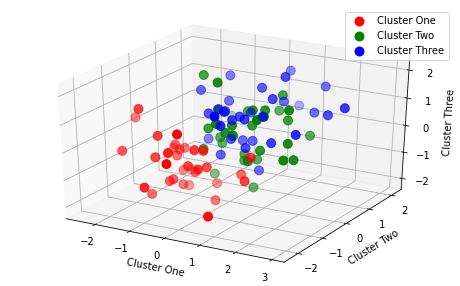

Text(0, 0.5, 'WCSS(within cluster sum of squares)')

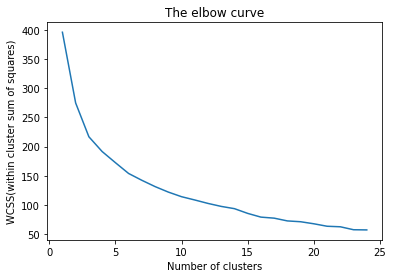

In [9]:
# Load orange data set
filename = '/content/drive/MyDrive/Colab Notebooks/ml_assignment_dataset/orange.txt'
dataframe = pd.read_csv(filename, header=None, delim_whitespace=True) 
X = dataframe.values 
# set the first three observations as initial centroid 
initial_centroid = X[0:3:] 
# build kMeans model and fit 
model = KMeans(n_clusters = 3, random_state = 1,init=initial_centroid, n_init=1) #model.fit(X) 
y_kmeans = model.fit_predict(X) 
dists = euclidean_distances(model.cluster_centers_) 
# Get the cluster labels 
labels = model.labels_ 
tri_dists = dists[np.triu_indices(3, 1)] 
max_dist, avg_dist, min_dist = tri_dists.max(), tri_dists.mean(), tri_dists.min() 
# Plotting the cluster centers and the data points on a 2D plane 
plt.figure(figsize=(8,5)) 
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='black', marker='X', s=200, label = 'Centroids') 
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluste r One') 
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Clust er Two') 
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Clus ter Three') 
plt.legend() 
plt.title('Data points and cluster centroids') 
plt.show() 
# 3d plot 
print('Generating 3D representation of clusters : ') 
fig = plt.figure(figsize=(8,5)) 
ax = fig.add_subplot(111, projection='3d') 
g1 = (X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], X[y_kmeans == 0, 2]) 
g2 = (X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], X[y_kmeans == 1, 2]) 
g3 = (X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], X[y_kmeans == 2, 2]) 
data = (g1, g2, g3) 
colors = ("red", "green", "blue") 
groups = ("Cluster One", "Cluster Two", "Cluster Three") 
# Create plot 
for data, color, group in zip(data, colors, groups): 
  x, y, z = data 
  ax.scatter(x, y, z, c=color, s=80, label=group) 
ax.set_xlabel('Cluster One') 
ax.set_ylabel('Cluster Two') 
ax.set_zlabel('Cluster Three') 
plt.legend() 
plt.show() 
#Finding the optimum number of clusters for k-means classification 
wcss = [] 
for i in range(1, 25): 
  kmeans = KMeans(n_clusters = i, max_iter = 500, random_state = 1)

  kmeans.fit(X) 
  wcss.append(kmeans.inertia_) 
#Plotting the results onto a line graph, allowing us to observe 'The elbow' plt.figure(figsize=(8,5)) 
plt.plot(range(1, 25), wcss) 
plt.title('The elbow curve') 
plt.xlabel('Number of clusters') 
plt.ylabel('WCSS(within cluster sum of squares)') #within cluster sum of squares plt.show()

**Problem 3** PCA and plotting high dimentional data
In this exercise you shall find the 2 largest principal components for the Iris data, and make
a plot of the points transformed with the coordinates relative to the 2-dimentional basis of
those components.
You may find your own way of doing it, or use the following steps as a guideline:

**a )** Read the data, and store the features in a 150 × 4 matrix.
Calculate the mean of each feature, and center the columns at 0 in a matrix M by the
transformation mij = xij − μj .
Then cumpute the scatter matrix S =M’M.

**b )** Compute the eigenvalues and eigenvectors for S.
Make sure they are ordered for decreasing values of the eigenvalues, and thet they are
standardised to norm 1.

**c )** Pick the two eigenvectors v1 and v2 with largest eigenvalues, and store them in a 4×2
matrix.

**d )** Let Y be the 150 × 2 matrix with the coordinates relative to {v1, v2}.
Compute Y .

e ) Make a plot of Y , where the points are colored according to which class they belong.
Comment about this projected plot


In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 

In [11]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [12]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [14]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

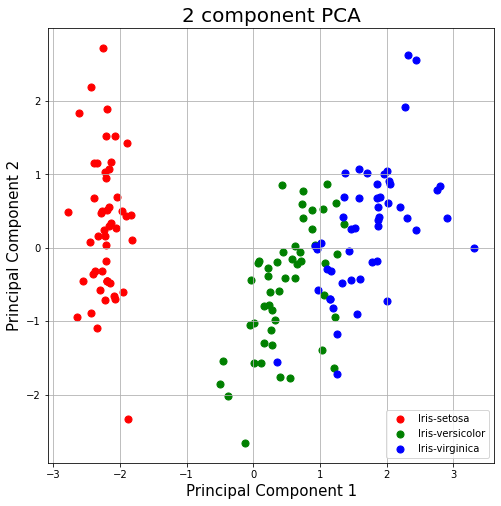

In [15]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [16]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])